# Realizará una regresión utilizando el archivo `data/cars.csv`.

- Estás prediciendo `mpg` a partir de otras características
- ¡Los datos están desordenados!
- Recuerda pretratar tus datos
- Mirar algunas visualizaciones
- Pruebe todos los modelos relevantes
- ¿Qué métrica está tratando de optimizar?
- ¿Qué puntuación obtuviste para tu modelo final?

In [ ]:
# Básicos
import numpy as np
import pandas as pd
import scipy.stats as stats

# Graficas
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Preprocesamiento
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

# Selección del modelo
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve)

# Modelos
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression

# Habilitar la recarga de archivos modificados
%load_ext autoreload
%autoreload 2

# Graficas en linea
%matplotlib inline

# Cargar datos

In [ ]:
df = pd.read_csv('data/cars.csv').iloc[:,1:-1]; df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,eight,307.0,130,3504.0,12.0,70,USA
1,15.0,eight,350.0,165,3693.0,11.5,70,USA


# Mira los datos

In [ ]:
# caballos de fuerza y el peso necesitan ser arreglados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    object 
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 25.0+ KB


In [ ]:
# tenemos valores atípicos para el desplazamiento
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
displacement,398.0,280.890704,1551.708561,-2000.0,104.250,148.5,265.750,30000.0
weight,392.0,2976.658163,849.912100,1613.0,2227.500,2811.0,3614.750,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [ ]:
# comprobar si faltan valores
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          6
acceleration    0
model           0
origin          0
dtype: int64

# Valores faltantes

In [ ]:
df[df.weight.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
16,18.0,six,199.0,97,NaN,15.5,70,USA
29,27.0,four,-500.0,88,NaN,14.5,71,Mexico
194,22.5,six,232.0,90,NaN,17.6,76,USA
238,33.5,four,98.0,83,NaN,15.9,77,USA
253,20.5,six,200.0,95,NaN,18.2,78,USA
380,36.0,four,120.0,88,NaN,14.5,82,Mexico


In [ ]:
# imputar significa reemplazar los valores faltantes con algún otro valor
df.weight.mean()

2976.658163265306

In [ ]:
df['weight'] = df.weight.fillna(df.weight.mean())

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    object 
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 25.0+ KB


# valores ordinales

In [ ]:
df.cylinders.unique()

array(['eight', 'four', 'six', 'three', 'five'], dtype=object)

In [ ]:
df['cylinders'] = df.cylinders.map({'eight':8, 'four':4, 'six':6, 'three':3, 'five':5})

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130,3504.0,12.0,70,USA
1,15.0,8,350.0,165,3693.0,11.5,70,USA
2,18.0,8,318.0,150,3436.0,11.0,70,USA
3,16.0,8,304.0,150,3433.0,12.0,70,USA
4,17.0,8,302.0,140,3449.0,10.5,70,USA


# Valores nominales

In [ ]:
df.origin.unique()

array(['USA', 'Mexico', 'Canada'], dtype=object)

In [ ]:
df[['Is_Mexico', 'Is_USA']] = pd.get_dummies(df.origin, drop_first=True, prefix="Is")

In [ ]:
df = df.drop('origin', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,Is_Mexico,Is_USA
0,18.0,8,307.0,130,3504.0,12.0,70,0,1
1,15.0,8,350.0,165,3693.0,11.5,70,0,1
2,18.0,8,318.0,150,3436.0,11.0,70,0,1
3,16.0,8,304.0,150,3433.0,12.0,70,0,1
4,17.0,8,302.0,140,3449.0,10.5,70,0,1


# Valores basura

In [ ]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', 'abcd', '167', '94', '107',
       '230', '49', '75', '91', '122', '67', '83', '78', '52', '61', '93',
       '148', '129', '96', '71', '98', '115', '53', '81', '79', '120',
       '152', '102', '108', '68', '58', '149', '89', '63', '48', '66',
       '139', '103', '125', '133', '138', '135', '142', '77', '62', '132',
       '84', '64', '74', '116', 'xyz', '82'], dtype=object)

In [ ]:
df[~df.horsepower.str.isnumeric()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,Is_Mexico,Is_USA
32,25.0,4,98.0,?,2046.0,19.0,71,0,1
60,20.0,4,140.0,?,2408.0,19.5,72,0,1
95,12.0,8,455.0,abcd,4951.0,11.0,73,0,1
126,21.0,6,200.0,?,2875.0,17.0,74,0,1
330,40.9,4,85.0,?,1835.0,17.3,80,0,0
336,23.6,4,140.0,?,2905.0,14.3,80,0,1
354,34.5,4,100.0,?,2320.0,15.8,81,0,0
374,23.0,4,151.0,?,3035.0,20.5,82,0,1
389,22.0,6,232.0,xyz,2835.0,14.7,82,0,1


In [ ]:
hp = pd.to_numeric(df.horsepower, errors='coerce')

In [ ]:
hp.mean()

104.17737789203085

In [ ]:
hp.isna().sum()

9

In [ ]:
df['horsepower'] = hp.fillna(hp.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   Is_Mexico     398 non-null    uint8  
 8   Is_USA        398 non-null    uint8  
dtypes: float64(5), int64(2), uint8(2)
memory usage: 22.7 KB


In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
Is_Mexico       0
Is_USA          0
dtype: int64

# Outliers (valores atípicos)

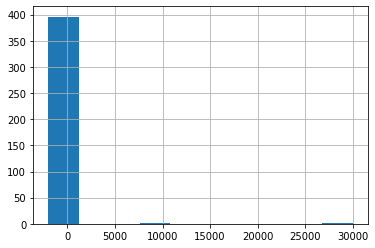

In [ ]:
df.displacement.hist();

In [ ]:
df.displacement.sort_values()

84     -2000.0
29      -500.0
117       68.0
111       70.0
334       70.0
        ...   
95       455.0
8        455.0
13       455.0
113     8000.0
11     30000.0
Name: displacement, Length: 398, dtype: float64

In [ ]:
# valores negativos eliminados
df = df[df.displacement > 0]

In [ ]:
df.displacement.min()

68.0

In [ ]:
# eliminando filas con más de 3 std dev lejos del centro
df = df[stats.zscore(df.displacement) < 3]

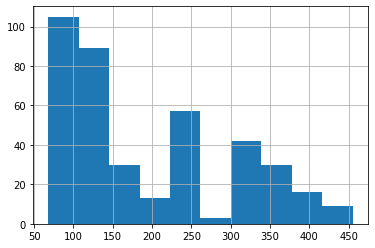

In [ ]:
df.displacement.hist();

# Visualizaciones


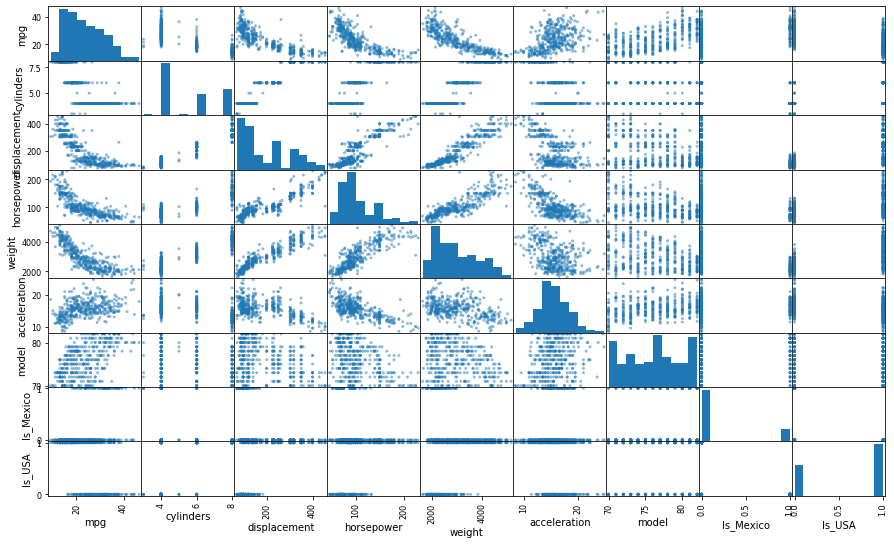

In [ ]:
scatter_matrix(df, figsize=(15,9));

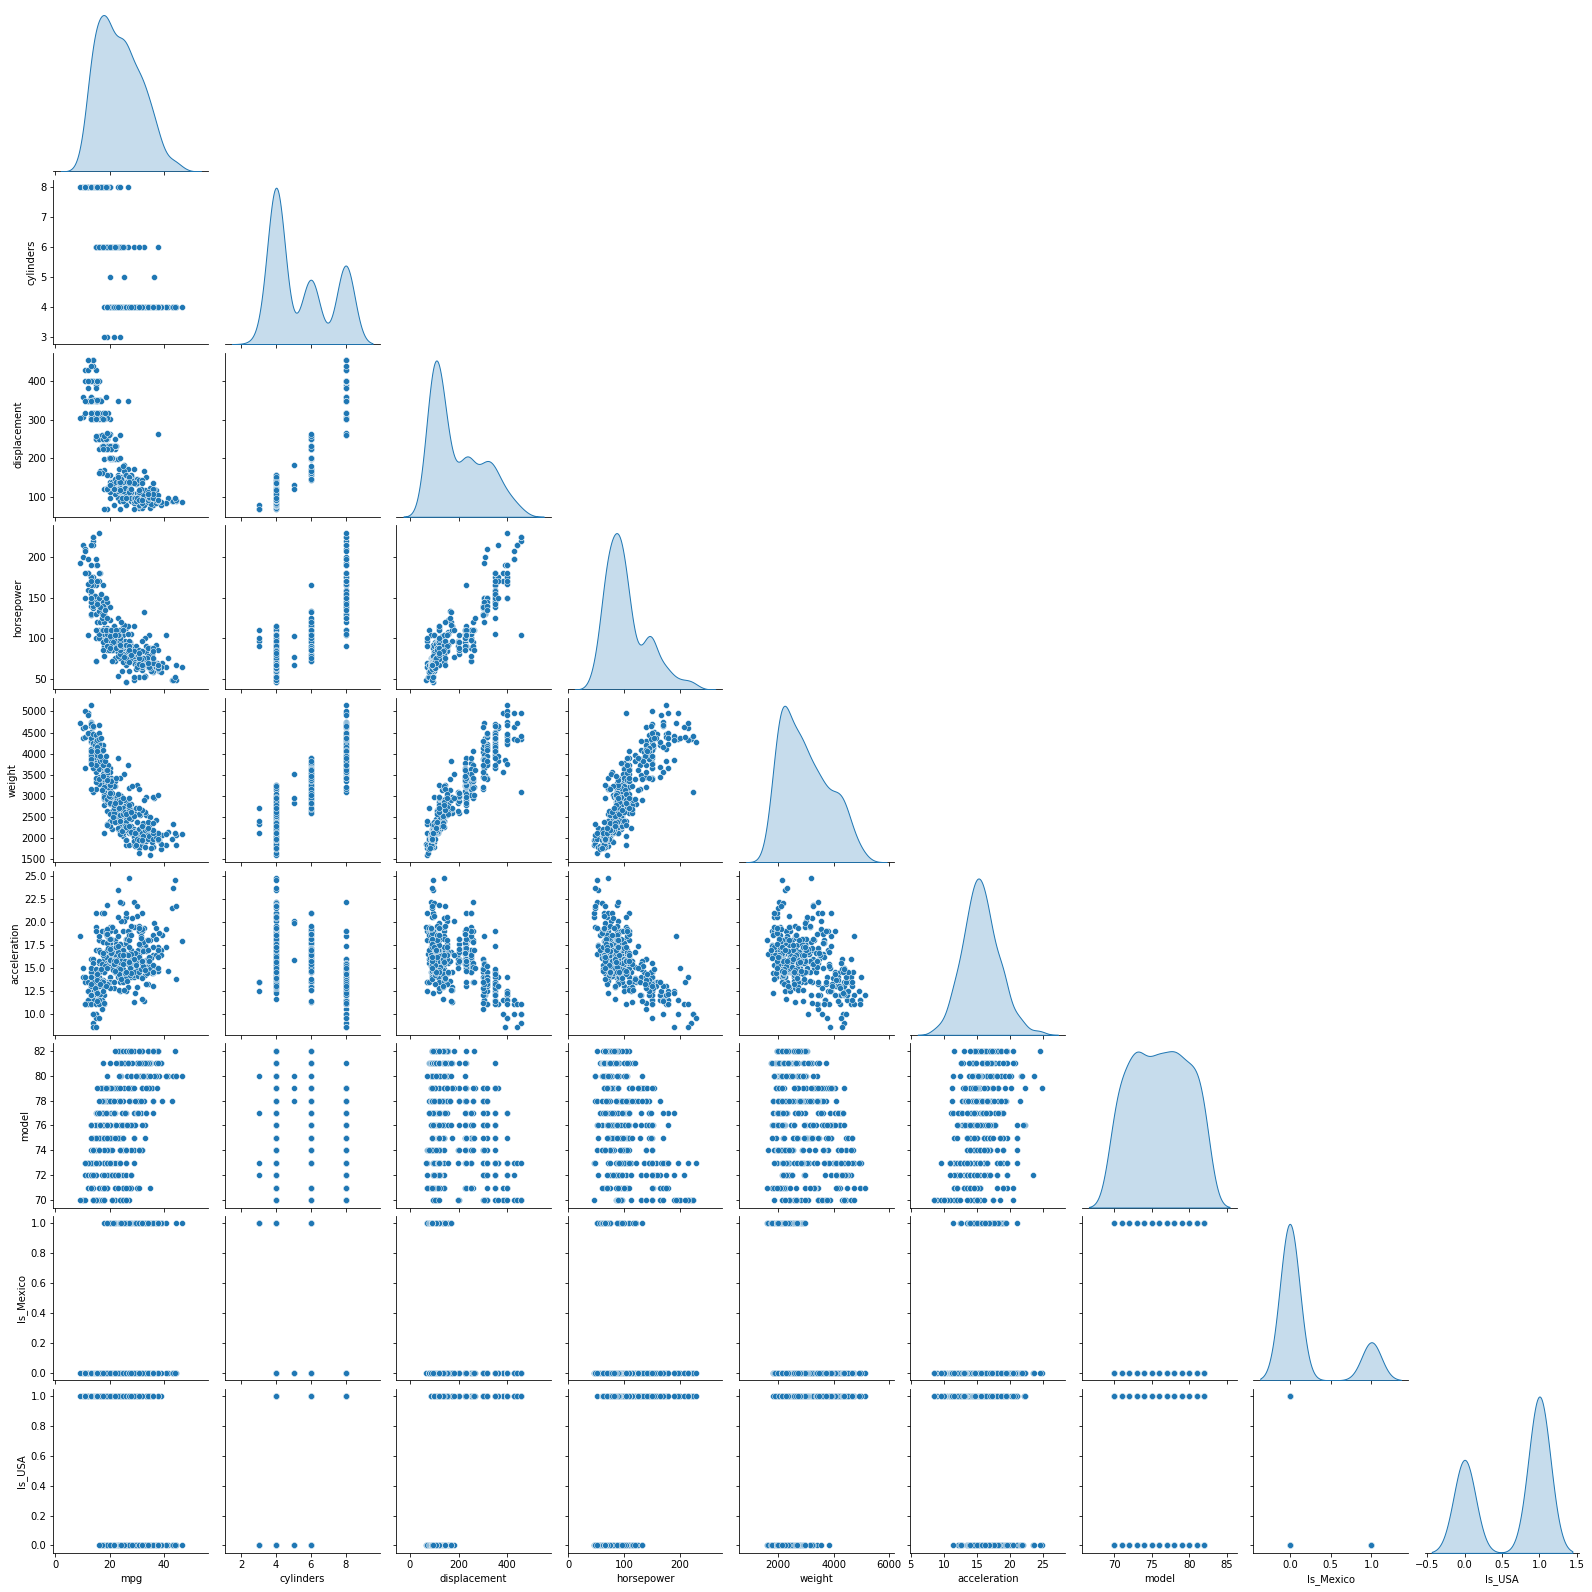

In [ ]:
sns.pairplot(df, corner=True, diag_kind='kde');

# Modelado



In [ ]:
y = df.mpg
X = df.iloc[:,1:]

In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model,Is_Mexico,Is_USA
0,8,307.0,130.0,3504.0,12.0,70,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Escalamento de los datos

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
X_train

array([[ 0.32722104,  0.56604063, -0.72129648, ..., -0.03949144,
        -0.49047532,  0.77695466],
       [-0.8516712 , -1.00570306, -0.93868013, ..., -0.31281377,
        -0.49047532, -1.2870764 ],
       [-0.8516712 , -0.51453316, -0.44956691, ...,  0.78047555,
        -0.49047532,  0.77695466],
       ...,
       [ 0.32722104,  0.38921947, -0.12349144, ..., -1.40610309,
        -0.49047532,  0.77695466],
       [ 0.32722104, -0.19036102,  0.2841029 , ...,  0.78047555,
        -0.49047532,  0.77695466],
       [ 0.32722104,  0.32045568,  0.14823812, ...,  0.50715322,
        -0.49047532,  0.77695466]])

# Grid Search

In [ ]:
parameters = {}
model = LinearRegression()
gs = GridSearchCV(model, parameters, cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


(0.7875181386396343, {})

In [ ]:
parameters = {'alpha': np.logspace(-5, 5)}
model = Ridge()
gs = GridSearchCV(model, parameters, cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


(0.7877213272465967, {'alpha': 0.7906043210907702})

In [ ]:
parameters = {'alpha': np.logspace(-5, 5)}
model = Lasso()
gs = GridSearchCV(model, parameters, cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


(0.7875761557134913, {'alpha': 0.0071968567300115215})

In [ ]:
parameters = {'n_neighbors': range(2,100), 'metric': ['manhattan', 'euclidean']}
model = KNeighborsRegressor()
gs = GridSearchCV(model, parameters, cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

Fitting 5 folds for each of 196 candidates, totalling 980 fits


(0.8363300181480897, {'metric': 'manhattan', 'n_neighbors': 4})

In [ ]:
# Modelo Final

In [ ]:
final = KNeighborsRegressor(metric= 'manhattan', n_neighbors=4).fit(X_train, y_train)

In [ ]:
final.score(X_test, y_test)

0.8610137653372361

In [ ]:
final.predict(X_test)

array([19.25 , 29.175, 20.675, 33.95 , 23.9  , 36.25 , 16.5  , 17.   ,
       23.   , 34.3  , 13.   , 22.9  , 30.1  , 25.   , 19.5  , 25.65 ,
       22.5  , 25.65 , 33.3  , 38.825, 33.525, 33.35 , 20.375, 27.   ,
       24.5  , 35.525, 36.3  , 27.5  , 20.55 , 24.5  , 30.25 , 35.85 ,
       26.5  , 18.   , 25.75 , 28.45 , 18.375, 34.65 , 26.725, 12.5  ,
       25.5  , 35.075, 16.175, 13.5  , 25.75 , 14.75 , 18.75 , 21.5  ,
       13.25 , 13.25 , 23.25 , 20.475, 12.75 , 18.025, 20.175, 18.   ,
       15.875, 14.   , 32.45 , 14.25 , 15.85 , 34.825, 25.75 , 13.75 ,
       25.75 , 24.   , 17.375, 32.45 , 38.825, 20.475, 28.1  , 33.775,
       19.5  , 25.85 , 14.   , 18.8  , 14.25 , 32.75 , 29.5  , 26.75 ,
       24.75 , 18.25 , 24.225, 13.5  , 16.5  , 24.825, 15.375, 14.   ,
       27.8  , 31.9  , 12.75 , 14.25 , 14.5  , 13.75 , 19.05 , 22.75 ,
       35.275, 29.625, 27.025, 18.225, 25.075, 33.175, 35.8  , 18.9  ,
       38.2  , 13.75 , 35.6  , 13.75 , 13.5  , 19.25 , 17.25 , 28.55 ,
      